In [109]:
!git clone https://github.com/MyungKyuYi/AI-class.git

fatal: destination path 'AI-class' already exists and is not an empty directory.


In [110]:
import numpy as np
import pandas as pd
db = pd.read_csv("/content/AI-class/diabetes.csv")

In [111]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [112]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']
db = pd.read_csv("/content/AI-class/diabetes.csv", header=0, names=cols).dropna()


db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [113]:
X = db.drop(columns=["BMI","Outcome"])

y = db["BMI"]


In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=None, random_state=42)

In [115]:
 from tensorflow.keras import layers, models

In [116]:
#x.shape[1]은 특징의 수 이다. -> 직접 특징의 수를 세어서 적어도 됨
#y.shape는 최종 분류할 때 클래스의  개수이다. -> 직접 분류할 클래스의 개수를 세어서 적어도 됨
from tensorflow.keras.optimizers import Adam # Adam 옵티마이저를 직접 import
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    #layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)   # 클래스 수 맞춤
])

model.compile(
    optimizer= "adam",
    loss="mse",   #회귀 문제이므로 mse 사용
    metrics=["mse"]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
print(X.shape, y.shape)

(768, 7) (768,)


In [118]:
#검증 세트를 편리하게 만듬
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 404.7486 - mse: 404.7486 - val_loss: 69.2817 - val_mse: 69.2817
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 72.9111 - mse: 72.9111 - val_loss: 56.6832 - val_mse: 56.6832
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60.9671 - mse: 60.9671 - val_loss: 50.8506 - val_mse: 50.8506
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 57.7328 - mse: 57.7328 - val_loss: 50.6721 - val_mse: 50.6721
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.4098 - mse: 52.4098 - val_loss: 48.8433 - val_mse: 48.8433
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.4360 - mse: 59.4360 - val_loss: 47.5268 - val_mse: 47.5268
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.2297 - mse: 40.2297 - val_loss: 51.9560 - val_mse: 51.9560
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.1827 - mse: 46.1827 - val_loss: 45.4939 - val_mse: 45.4939
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━

In [119]:
# 학습 곡선
loss = history.history['loss']
val_loss = history.history['val_loss']
mse = history.history['mse']
val_mse = history.history['val_mse']

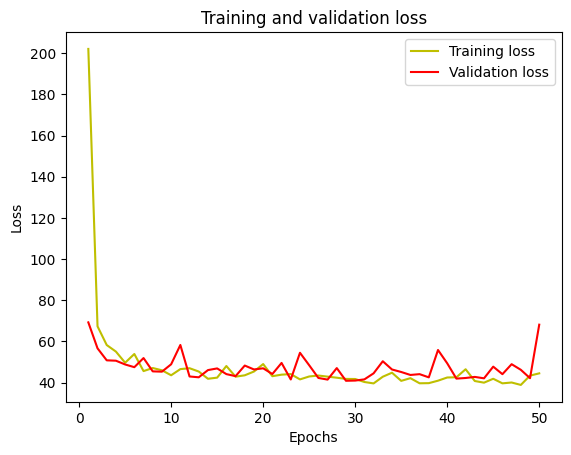

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [121]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)

# MSE 출력
print(f"Mean Squared Error (MSE): {mse:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Mean Squared Error (MSE): 98.6608
